<a href="https://colab.research.google.com/github/vsoos/DeepLearning/blob/main/exWithoutKeras/PyTorchLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/analytics-vidhya/linear-regression-with-pytorch-147fed55f138

In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import os

In [ ]:
folder_path = "/content/drive/MyDrive/deeplearning2024_VincenzinaSoos/ex_withoutKeras/"
os.chdir(folder_path)

In [ ]:
salary = pd.read_csv("data/salary.csv")
salary.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
salary.info()
salary.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [ ]:
x = salary["YearsExperience"]
y = salary["Salary"]
x, y

(0      1.2
 1      1.4
 2      1.6
 3      2.1
 4      2.3
 5      3.0
 6      3.1
 7      3.3
 8      3.3
 9      3.8
 10     4.0
 11     4.1
 12     4.1
 13     4.2
 14     4.6
 15     5.0
 16     5.2
 17     5.4
 18     6.0
 19     6.1
 20     6.9
 21     7.2
 22     8.0
 23     8.3
 24     8.8
 25     9.1
 26     9.6
 27     9.7
 28    10.4
 29    10.6
 Name: YearsExperience, dtype: float64,
 0      39344.0
 1      46206.0
 2      37732.0
 3      43526.0
 4      39892.0
 5      56643.0
 6      60151.0
 7      54446.0
 8      64446.0
 9      57190.0
 10     63219.0
 11     55795.0
 12     56958.0
 13     57082.0
 14     61112.0
 15     67939.0
 16     66030.0
 17     83089.0
 18     81364.0
 19     93941.0
 20     91739.0
 21     98274.0
 22    101303.0
 23    113813.0
 24    109432.0
 25    105583.0
 26    116970.0
 27    112636.0
 28    122392.0
 29    121873.0
 Name: Salary, dtype: float64)

Text(0.5, 1.0, 'Years of experience and salary correlation')

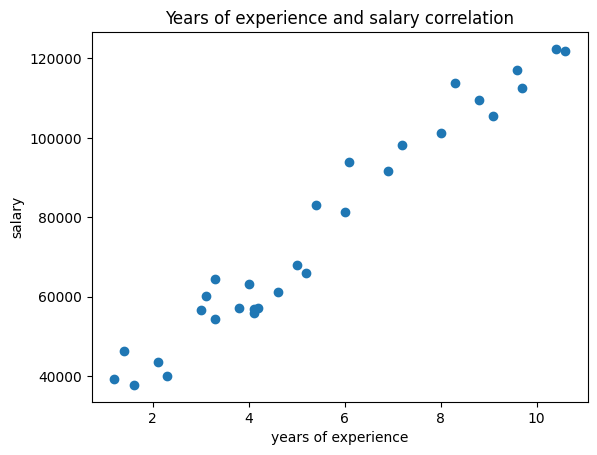

In [ ]:
plt.scatter(x,y)
plt.xlabel("years of experience")
plt.ylabel("salary")
plt.title("Years of experience and salary correlation")

In [ ]:
#Convert to list
x_numpy = np.array(list(x), dtype = np.float32)
x_numpy

array([ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.3,  3.8,  4. ,
        4.1,  4.1,  4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,
        8. ,  8.3,  8.8,  9.1,  9.6,  9.7, 10.4, 10.6], dtype=float32)

In [ ]:
y_numpy = np.array(list(y), dtype = np.float32)
y_numpy

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.], dtype=float32)

In [ ]:
x_torch = torch.tensor(x_numpy).unsqueeze(1)
x_torch, x_torch.dtype, x_torch.shape

(tensor([[ 1.2000],
         [ 1.4000],
         [ 1.6000],
         [ 2.1000],
         [ 2.3000],
         [ 3.0000],
         [ 3.1000],
         [ 3.3000],
         [ 3.3000],
         [ 3.8000],
         [ 4.0000],
         [ 4.1000],
         [ 4.1000],
         [ 4.2000],
         [ 4.6000],
         [ 5.0000],
         [ 5.2000],
         [ 5.4000],
         [ 6.0000],
         [ 6.1000],
         [ 6.9000],
         [ 7.2000],
         [ 8.0000],
         [ 8.3000],
         [ 8.8000],
         [ 9.1000],
         [ 9.6000],
         [ 9.7000],
         [10.4000],
         [10.6000]]),
 torch.float32,
 torch.Size([30, 1]))

In [ ]:
y_torch = torch.tensor(y_numpy).unsqueeze(1)

In [ ]:
import torch.nn as nn
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(1,1)
    def forward(self, x_torch):
        return self.layer(x_torch)

In [ ]:
model = LinearRegression()

In [ ]:
loss_fn = nn.MSELoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(params= model.parameters(), lr = learning_rate)

In [ ]:
loss_list=[]
epochs = 1000
for epoch in range(epochs):
    model.train()

    y_pred = model(x_torch)

    loss = loss_fn(y_pred, y_torch)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    loss_list.append(loss.data)

    if(epochs % 10 == 0):
        print('epoch {}, loss {}'.format(epochs, loss.data))

    model.eval()

epoch 1000, loss 6503280128.0
epoch 1000, loss 5575749120.0
epoch 1000, loss 4783432192.0
epoch 1000, loss 4106619648.0
epoch 1000, loss 3528467712.0
epoch 1000, loss 3034594560.0
epoch 1000, loss 2612712192.0
epoch 1000, loss 2252325376.0
epoch 1000, loss 1944467328.0
epoch 1000, loss 1681480576.0
epoch 1000, loss 1456822528.0
epoch 1000, loss 1264905344.0
epoch 1000, loss 1100955520.0
epoch 1000, loss 960895936.0
epoch 1000, loss 841243072.0
epoch 1000, loss 739021696.0
epoch 1000, loss 651690752.0
epoch 1000, loss 577079168.0
epoch 1000, loss 513332576.0
epoch 1000, loss 458866720.0
epoch 1000, loss 412328800.0
epoch 1000, loss 372562816.0
epoch 1000, loss 338581568.0
epoch 1000, loss 309541568.0
epoch 1000, loss 284722656.0
epoch 1000, loss 263509248.0
epoch 1000, loss 245375664.0
epoch 1000, loss 229872912.0
epoch 1000, loss 216617488.0
epoch 1000, loss 205281728.0
epoch 1000, loss 195585728.0
epoch 1000, loss 187290512.0
epoch 1000, loss 180191792.0
epoch 1000, loss 174115168.0
e

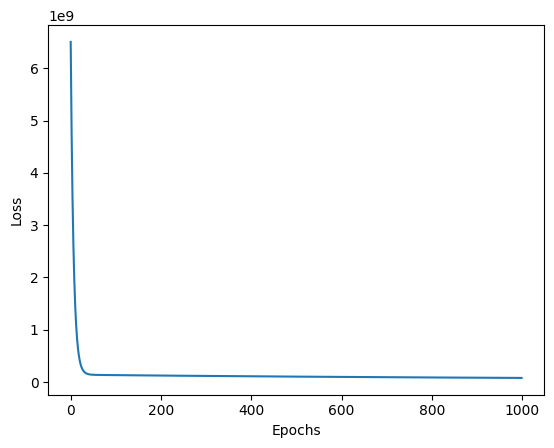

In [ ]:
plt.plot(range(epochs),loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

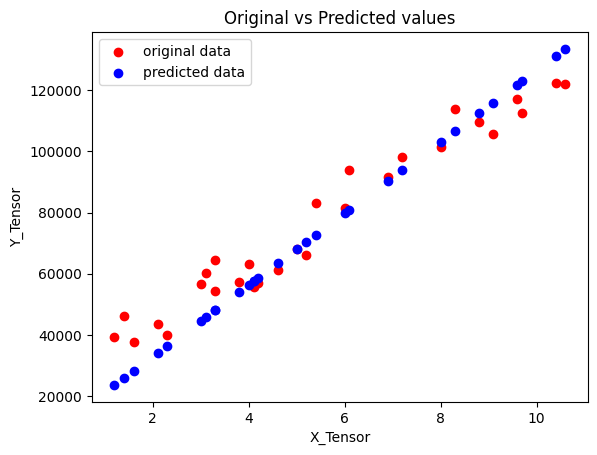

In [ ]:
predicted = model(x_torch).data.numpy()
plt.scatter(x_torch, y_torch, label = "original data", color = "red")
plt.scatter(x_torch, predicted, label = "predicted data", color = "blue")

plt.legend()
plt.xlabel("X_Tensor")
plt.ylabel("Y_Tensor")
plt.title("Original vs Predicted values")
plt.show()